<a href="https://colab.research.google.com/github/yakupilyas/GoogleColabIntro/blob/main/Ders4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

watermark kütüphanesi ekleme

In [2]:
!pip install -q watermark

In [3]:
%load_ext watermark

%watermark -v -p cv2

Python implementation: CPython
Python version       : 3.7.10
IPython version      : 5.5.0

cv2: 4.1.2



import cv2 ile opencv kütüphanesi ekledik. seaborn paketi grafiksel figuranların daha süslü görünmesini sağlayan paket. Phton kütüphanesinden import ettik.

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams

%matplotlib inline

sns.set_style("white")

rcParams['figure.figsize'] = 12, 10

gdown komutu google drivedan dosya indirme komutudur.  yanına yazılan dosya google drivedan indirmeyi sağlar. /// ÇOKLU RESİM NASIL EKLENİR ARASTIR?
https://docs.opencv.org/4.2.0/d4/da8/group__imgcodecs.html#ga61d9b0126a3e57d9277ac48327799c80

In [7]:
!gdown --id 16jP0_ESP0PXnrbygsWMeqlIU-jAP6dJ6

Downloading...
From: https://drive.google.com/uc?id=16jP0_ESP0PXnrbygsWMeqlIU-jAP6dJ6
To: /content/snail.jpg
100% 212k/212k [00:00<00:00, 1.86MB/s]


imgread komutu ile eklediğimiz resmi okutuyoruz, img olarak tanımladık.↓↓↓

In [8]:
img = cv2.imread(filename = 'snail.jpg', flags = cv2.IMREAD_COLOR)

resmimizin boyunutu ve renk kanallarını img.shape komutu ile yazdırdık ↓↓↓

In [10]:
h, w, channels = img.shape

print(f'height: {h}, width: {w}, color channels: {channels}')

height: 1710, width: 1600, color channels: 3


resmimizi RGB olarak gösterdik. ↓↓↓

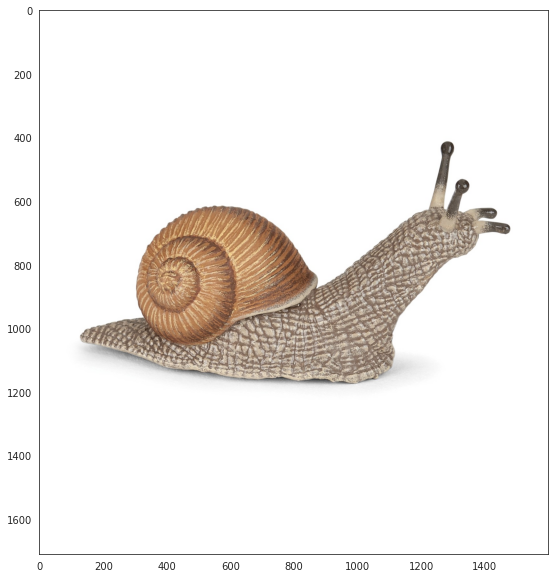

In [11]:
plt.imshow(cv2.cvtColor(src = img, code = cv2.COLOR_BGR2RGB));

resmi gerçek resim tonları ile gösterdik BGR olarak gösterdik  ↓↓↓

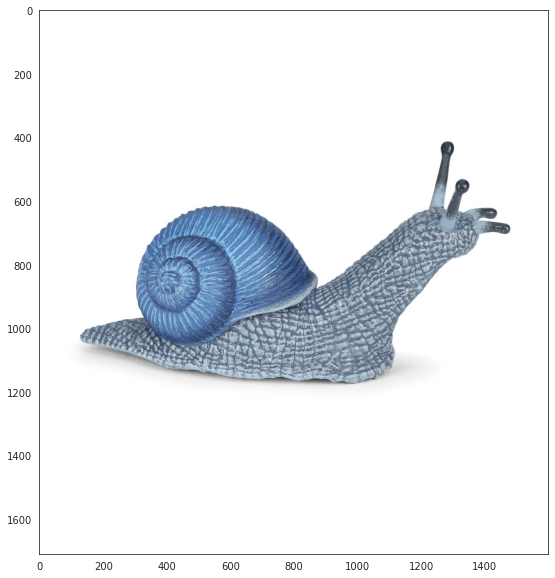

In [12]:
plt.imshow(img);

resmimizi gri olarak gösterdik. ↓↓↓

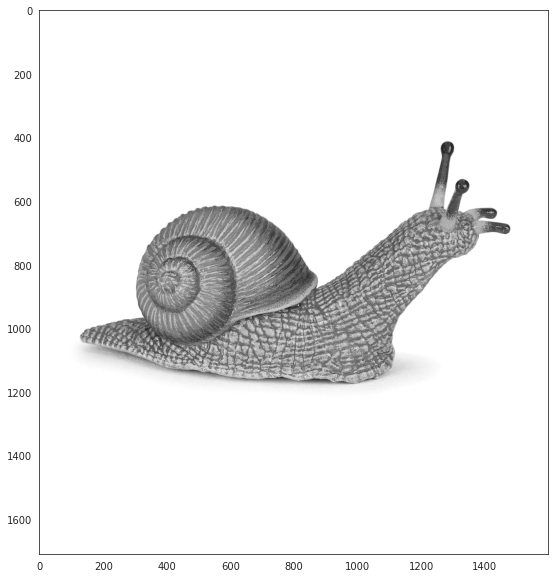

In [13]:
plt.imshow(cv2.cvtColor(src = img, code = cv2.COLOR_BGR2GRAY), cmap = 'gray');

griye çevirdiğimiz  resmimizi kaydettik. ↓↓↓

In [14]:
cv2.imwrite('snail-gray.jpg', cv2.cvtColor(src = img, code = cv2.COLOR_BGR2GRAY))

True

resmi ve resmin özelliklerini plot grafik ile tablonun cıkmasını tanımladık

In [18]:
def show_image(image, show_axis=True):
 plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
 if not show_axis:
    plt.axis('off');

bu komutta resmin boyutlarını ayarlıyor.  ↓ ↓ ↓

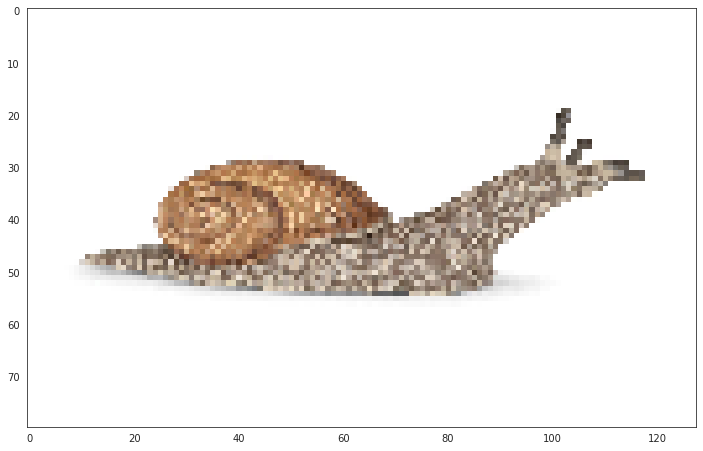

In [19]:
resize_width, resize_height = 128, 80

resized = cv2.resize(
 src = img,
 dsize=(resize_width, resize_height),
 interpolation=cv2.INTER_LANCZOS4
)

show_image(resized)

cropped resmi kırkmamızı saglıyor. belirli boyutlarda resmi kırpıyor  ↓ ↓ ↓

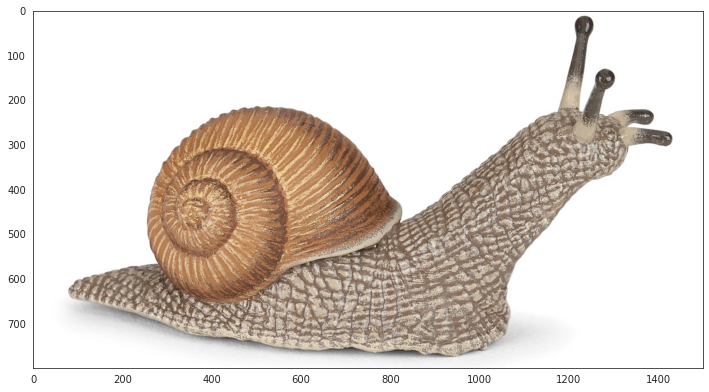

In [20]:
cropped = img[400:1200, 50:1550]

show_image(cropped)

resmi çevirmeyi kodlarla gösterilmesi  ↓ ↓ ↓

In [24]:
def rotate_bound(image, angle):
# grab the dimensions of the image and then determine the
# center
 (h, w) = image.shape[:2]
 (cX, cY) = (w // 2, h // 2)
# grab the rotation matrix (applying the negative of the
# angle to rotate clockwise), then grab the sine and cosine
# (i.e., the rotation components of the matrix)
 M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
 cos = np.abs(M[0, 0])
 sin = np.abs(M[0, 1])
# compute the new bounding dimensions of the image
 nW = int((h * sin) + (w * cos))
 nH = int((h * cos) + (w * sin))
# adjust the rotation matrix to take into account translation
 M[0, 2] += (nW / 2) - cX
 M[1, 2] += (nH / 2) - cY
# perform the actual rotation and return the image
 return cv2.warpAffine(image, M, (nW, nH))

hazır fonksiyonla resmi döndürme işlemi  ↓ ↓ ↓

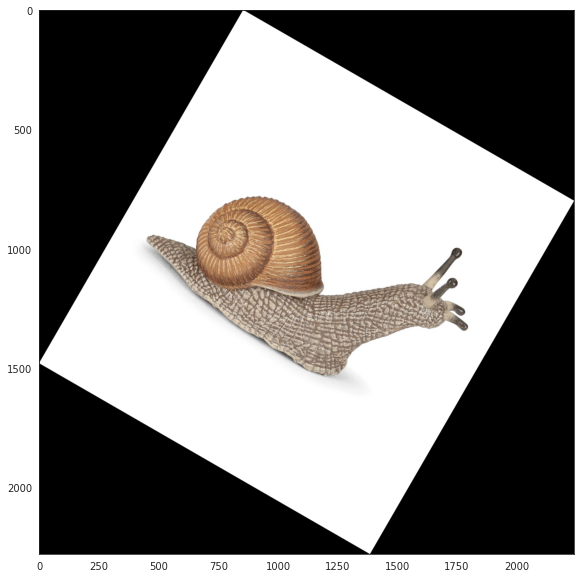

In [28]:
show_image(rotate_bound(img, 30))

2. bir resmimizi indiriyoruz  ↓ ↓ ↓

In [25]:
!gdown --id 1vpUJWPcjhJ6qY9ebZ3uQGlP0OYSocXJg

Downloading...
From: https://drive.google.com/uc?id=1vpUJWPcjhJ6qY9ebZ3uQGlP0OYSocXJg
To: /content/gym.jpg
2.12MB [00:00, 12.9MB/s]


resmi arkaplan olarak ekledik. boyutunu tekrar ayarladık ekranda gösterdik. resmi Yarı yarıya küçülttük  ↓ ↓ ↓

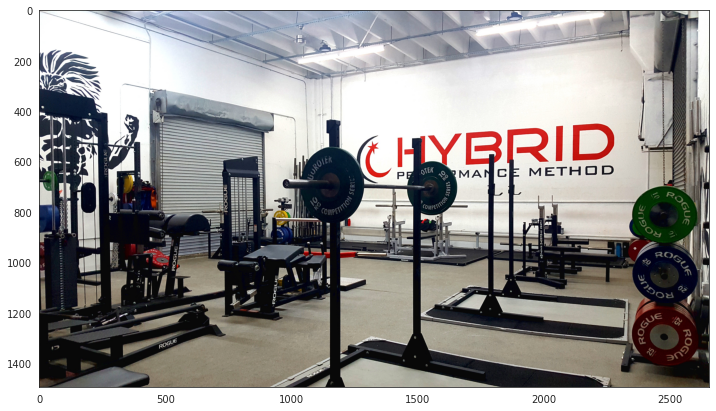

In [26]:
background = cv2.imread('gym.jpg', cv2.IMREAD_COLOR)
h, w, _ = background.shape

background = cv2.resize(background, (w // 2, h // 2))

show_image(background)

resmi blurlama bugulama islemi yaptık   ↓ ↓ ↓

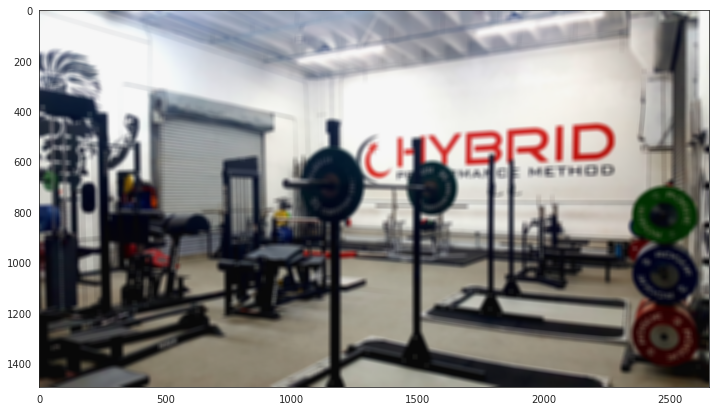

In [27]:
kernel_len = 21
blurred_background = cv2.GaussianBlur(
src = background,
ksize = (kernel_len, kernel_len),
sigmaX = 120,
sigmaY = 45
)

show_image(blurred_background)

resmin görüntünün dış hatlarını bulma

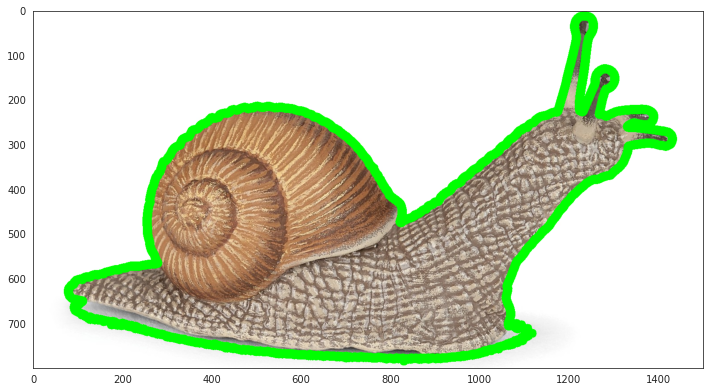

In [29]:
gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(
  src = gray,
  thresh = 225,
  maxval = 255, 
  type = cv2.THRESH_BINARY_INV
)

contours, _ = cv2.findContours(
  image = binary, 
  mode = cv2.RETR_EXTERNAL, 
  method = cv2.CHAIN_APPROX_SIMPLE
)

contour_img = cropped.copy()

show_image(
  cv2.drawContours(
    image = contour_img, 
    contours = contours, 
    contourIdx = -1, 
    color = (0, 255, 0), 
    thickness = 20
  )
)

**2 RESİMİ ÜST ÜSTE BİRLEŞTİRMEK İÇİN AŞAĞIDAKİ ADIMLAR İZLENİR  ↓ ↓ ↓** 

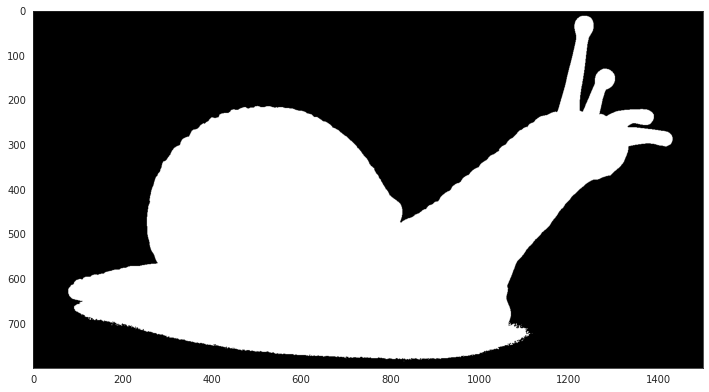

In [30]:
mask = np.zeros_like(cropped)
mask = cv2.drawContours(mask, contours, -1, (255, 255, 255), cv2.FILLED)

show_image(mask)

Salyangoz görüntüsünü resimden kırpıyoruz  ↓ ↓ ↓

In [31]:
masked_snail = cv2.bitwise_and(
  src1 = cropped, 
  src2 = cropped, 
  mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
)

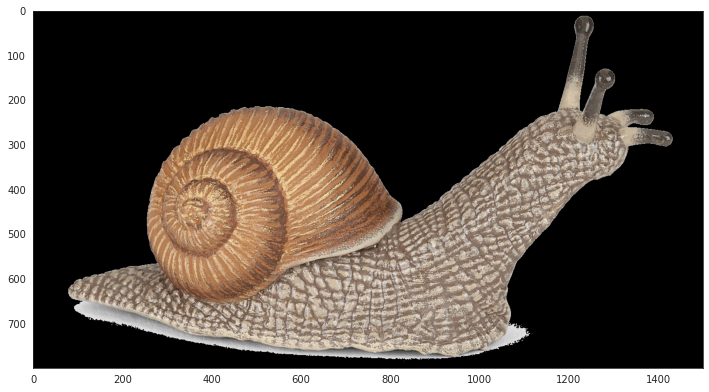

In [32]:
show_image(masked_snail)

kırptıgımız salyangoz görüntüsünü background olarak tanımladığımız resmin üstüne ekliyoruz  ↓ ↓ ↓

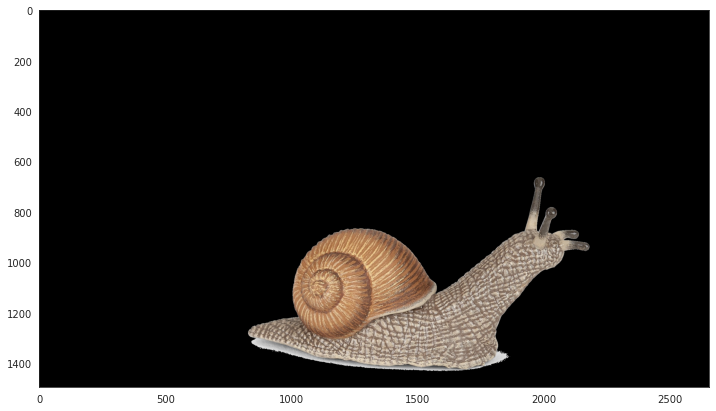

In [33]:
new_mask = np.zeros_like(blurred_background)
new_mask[
  650: 650 + masked_snail.shape[0],
  750: 750 + masked_snail.shape[1]
] = masked_snail

show_image(new_mask)

background resmimizi görünür hale getirip iki resimi üst üste görüyoruz  ↓ ↓ ↓

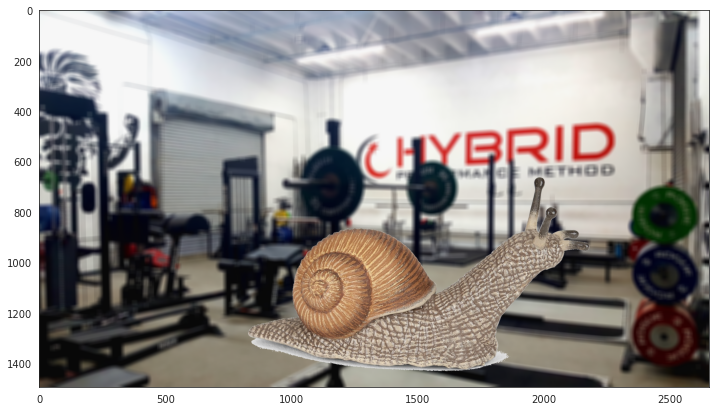

In [34]:
_, alpha = cv2.threshold(
  src = cv2.cvtColor(new_mask, cv2.COLOR_RGB2GRAY), 
  thresh = 0, 
  maxval = 255, 
  type = cv2.THRESH_BINARY
)
b, g, r = cv2.split(new_mask)
alpha_image = cv2.merge((b, g, r, alpha))
final_image = blurred_background.copy()
alpha_s = alpha_image[:, :, 3] / 255.0
alpha_l = 1.0 - alpha_s

for c in range(0, 3):
  final_image[:, :, c] = (alpha_s * alpha_image[:, :, c] +\
                          alpha_l * final_image[:, :, c])
show_image(final_image)

salyangozun gözlerinin konumunu belirleyip daireler ciziyoruz  ↓ ↓ ↓

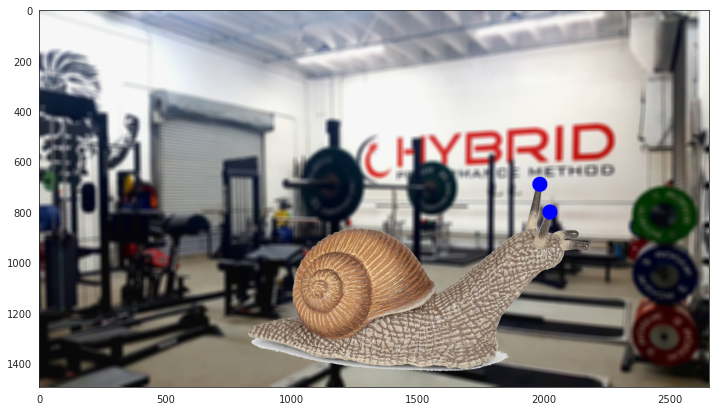

In [37]:
image = final_image.copy()

eye_coordinates = [(1985, 690), (2025, 800)]

for ec in eye_coordinates:
  image = cv2.circle(
    img = image, 
    center = ec, 
    radius = 30, 
    color = (255, 0, 0), 
    thickness = -1
  )

show_image(image)

birlestirilmis olan resimin üstüne yazı yazma işlemini gerçekleştiriyoruz  ↓ ↓ ↓

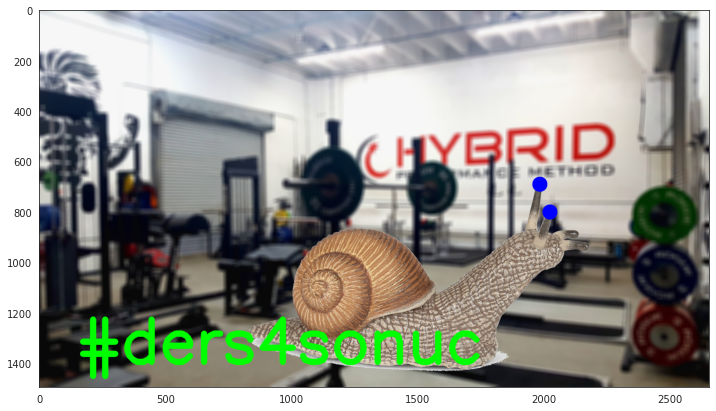

In [39]:
final_img = image.copy()

cv2.putText(
  img = final_img,
  text = '#ders4sonuc', 
  org = (150, final_img.shape[0] - 100), 
  fontFace = cv2.FONT_HERSHEY_SIMPLEX, 
  fontScale = 8,
  color = (0, 255, 0),
  thickness = 23
)

show_image(final_img)